# **Proyek Pertama Machine Learning Terapan - Supplement Sales Data**
* Nama: Aksamala Citrayuh Anasita
* ID: MC006D5X1415

# Import Library

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from google.colab import drive
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

import warnings
warnings.filterwarnings("ignore")

**Insight:**
- `Pandas`: Ini digunakan untuk memanipulasi dan menganalisis data dalam bentuk DataFrame.
- `numpy`: digunakan untuk perhitungan numerik dan manipulasi array/matriks.
- `seaborn`: library untuk visualisasi data yang dibangun di atas matplotlib. Digunakan untuk membuat plot statistik yang lebih kompleks dan informatif.
- `matplotlib.pyplot`: Library dasar untuk membuat visualisasi data, seperti grafik dan plot. Sering digunakan bersama seaborn untuk memperindah visualisasi.
- `from google.colab import drive`: Untuk menghubungkan Google Drive ke Colab, sehingga kamu bisa mengakses file dari Drive (seperti dataset).
- `sklearn.model_selection.train_test_split`: Fungsi ini digunakan untuk membagi dataset menjadi data latih dan data uji, penting agar model yang dibangun dapat dievaluasi dengan data yang belum pernah dilihat sebelumnya.
- `sklearn.preprocessing.LabelEncoder`: digunakan untuk mengubah data kategori menjadi bentuk numerik yang dapat diproses oleh algoritma machine learning.
- `sklearn.preprocessing.StandardScaler`: digunakan untuk menstandardisasi fitur dengan menghilangkan rata-rata dan menyesuaikan skala ke unit varians. Ini sering diterapkan pada data sebelum dimasukkan ke model.
- `sklearn.preprocessing.MinMaxScaler`: digunakan untuk mengubah fitur dengan membuat skala dari setiap fitur setiap fitur ke rentang yang ditentukan (biasanya antara 0 dan 1).
- `sklearn.neighbors.KNeighborsClassifier`: merupakan algoritma K-Nearest Neighbors (KNN) yang digunakan untuk klasifikasi data berdasarkan kemiripan dengan tetangga terdekat.
- `sklearn.tree.DecisionTreeClassifier`: Algoritma Decision Tree digunakan untuk membuat model klasifikasi atau regresi dalam bentuk struktur pohon keputusan.
- `sklearn.ensemble.RandomForestClassifier`: merupakan ensemble learning method yang menggabungkan beberapa Decision Tree untuk meningkatkan performa prediksi.
- `sklearn.svm.SVC`: Support Vector Machine digunakan untuk klasifikasi dengan mencari hyperplane yang memisahkan kelas-kelas data dengan margin terbesar.
- `sklearn.naive_bayes.GaussianNB`: Algoritma Naive Bayes digunakan untuk klasifikasi berdasarkan prinsip Teorema Bayes dengan asumsi sederhana bahwa fitur bersifat independen.
- `sklearn.metrics`: Library ini menyediakan berbagai fungsi untuk mengevaluasi performa model, seperti confusion_matrix, accuracy_score, precision_score, recall_score, dan f1_score.



# Load Data

In [2]:
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/MyDrive/Proyek Pertama ML Terapan/Supplement_Sales_Weekly_Expanded.csv')

Mounted at /content/drive


**Insight:**
Kode di atas digunakan untuk **mengakses file CSV yang tersimpan di Google Drive melalui Google Colab**. Baris `drive.mount('/content/drive')` berfungsi untuk **menghubungkan Google Drive dengan lingkungan kerja Colab**, sehingga file di Drive dapat diakses seperti direktori lokal. Setelah Drive berhasil terhubung, baris `df = pd.read_csv('/content/drive/MyDrive/Proyek Pertama ML Terapan/Supplement_Sales_Weekly_Expanded.csv')` digunakan untuk **membaca file CSV bernama `Supplement_Sales_Weekly_Expanded.csv`** yang berada di folder *MyDrive/Proyek Pertama ML Terapan*, lalu **menyimpannya ke dalam DataFrame `df`** agar bisa diproses lebih lanjut menggunakan pandas.

In [3]:
# Tampilkan DataFrame untuk memastikan telah dibaca dengan benar
df.head()

,Date,Product Name,Category,Units Sold,Price,Revenue,Discount,Units Returned,Location,Platform
0,2020-01-06,Whey Protein,Protein,143,31.98,4573.14,0.03,2,Canada,Walmart
1,2020-01-06,Vitamin C,Vitamin,139,42.51,5908.89,0.04,0,UK,Amazon
2,2020-01-06,Fish Oil,Omega,161,12.91,2078.51,0.25,0,Canada,Amazon
3,2020-01-06,Multivitamin,Vitamin,140,16.07,2249.80,0.08,0,Canada,Walmart
4,2020-01-06,Pre-Workout,Performance,157,35.47,5568.79,0.25,3,Canada,iHerb


**Insight:**
Data tersebut merupakan **cuplikan dataset penjualan produk kesehatan** yang berisi informasi transaksi harian dari berbagai kategori produk di beberapa lokasi dan platform. Setiap baris mewakili satu transaksi penjualan dan mencakup kolom berikut:

* `Date`: tanggal transaksi dilakukan,
* `Product Name`: nama produk yang dijual,
* `Category`: jenis produk (seperti Vitamin, Protein, Omega, dll),
* `Units Sold`: jumlah unit produk yang berhasil terjual,
* `Price`: harga satuan produk,
* `Revenue`: total pendapatan dari penjualan produk tersebut,
* `Discount`: diskon yang diberikan dalam bentuk desimal (misalnya 0.25 berarti 25%),
* `Units Returned`: jumlah unit yang dikembalikan,
* `Location`: negara tempat transaksi dilakukan (seperti Canada, UK),
* `Platform`: platform penjualan (seperti Amazon, Walmart, iHerb).

Data ini dapat digunakan untuk berbagai analisis seperti tren penjualan, efektivitas diskon, performa produk, dan preferensi pelanggan berdasarkan lokasi atau platform.

In [4]:
# Tampilkan informasi umum tentang dataset
print("\nInformasi dataset:")
df.info()


Informasi dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4384 entries, 0 to 4383
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            4384 non-null   object 
 1   Product Name    4384 non-null   object 
 2   Category        4384 non-null   object 
 3   Units Sold      4384 non-null   int64  
 4   Price           4384 non-null   float64
 5   Revenue         4384 non-null   float64
 6   Discount        4384 non-null   float64
 7   Units Returned  4384 non-null   int64  
 8   Location        4384 non-null   object 
 9   Platform        4384 non-null   object 
dtypes: float64(3), int64(2), object(5)
memory usage: 342.6+ KB


**Insight:**

Kode `df.info()` digunakan untuk menampilkan informasi umum mengenai struktur dataset yang disimpan dalam variabel `df`. Output yang dihasilkan menunjukkan bahwa dataset terdiri dari 4.384 baris dan 10 kolom. Setiap kolom memiliki nama, jumlah data yang tidak kosong (`Non-Null Count`), serta tipe datanya (`Dtype`). Dalam hal ini, terdapat 5 kolom bertipe objek (string), 2 kolom bertipe integer (`int64`), dan 3 kolom bertipe desimal (`float64`). Semua kolom memiliki jumlah data yang lengkap (tidak ada missing value). Informasi ini berguna untuk memahami struktur data sebelum melakukan analisis lebih lanjut atau preprocessing.

In [5]:
# Cek missing values
print("\nMissing values per fitur:")
print(df.isnull().sum())


Missing values per fitur:
Date              0
Product Name      0
Category          0
Units Sold        0
Price             0
Revenue           0
Discount          0
Units Returned    0
Location          0
Platform          0
dtype: int64


**Insight:**

Kode di atas digunakan untuk menampilkan informasi mengenai data yang hilang (missing values) dalam dataset. Fungsi `df.isnull().sum()` akan memeriksa setiap kolom dalam DataFrame `df` dan menghitung jumlah nilai kosong atau null di masing-masing kolom. Hasilnya menunjukkan bahwa tidak ada satu pun nilai yang hilang pada semua fitur, seperti `Date`, `Product Name`, `Category`, hingga `Platform`. Artinya, dataset bersih dan lengkap, sehingga tidak memerlukan penanganan khusus untuk data yang hilang sebelum analisis atau pemodelan dilakukan.

# Exploratory Data Analysis (EDA)

In [6]:
# Ubah kolom tanggal ke format datetime
df['Date'] = pd.to_datetime(df['Date'])

**Insight:**

Kode di atas digunakan untuk melakukan pemeriksaan awal dan prapemrosesan sederhana pada dataset. Pertama, kode menampilkan informasi umum tentang dataset, seperti jumlah baris dan kolom, tipe data tiap kolom, serta jumlah data non-null. Selanjutnya, dilakukan pengecekan **missing values** (data kosong) untuk memastikan kualitas data sebelum dianalisis lebih lanjut. Terakhir, kolom **'Date'** diubah ke dalam format **datetime** menggunakan fungsi `pd.to_datetime(df['Date'])` agar dapat digunakan dalam analisis berbasis waktu, seperti ekstraksi tahun, bulan, atau pengurutan berdasarkan tanggal.

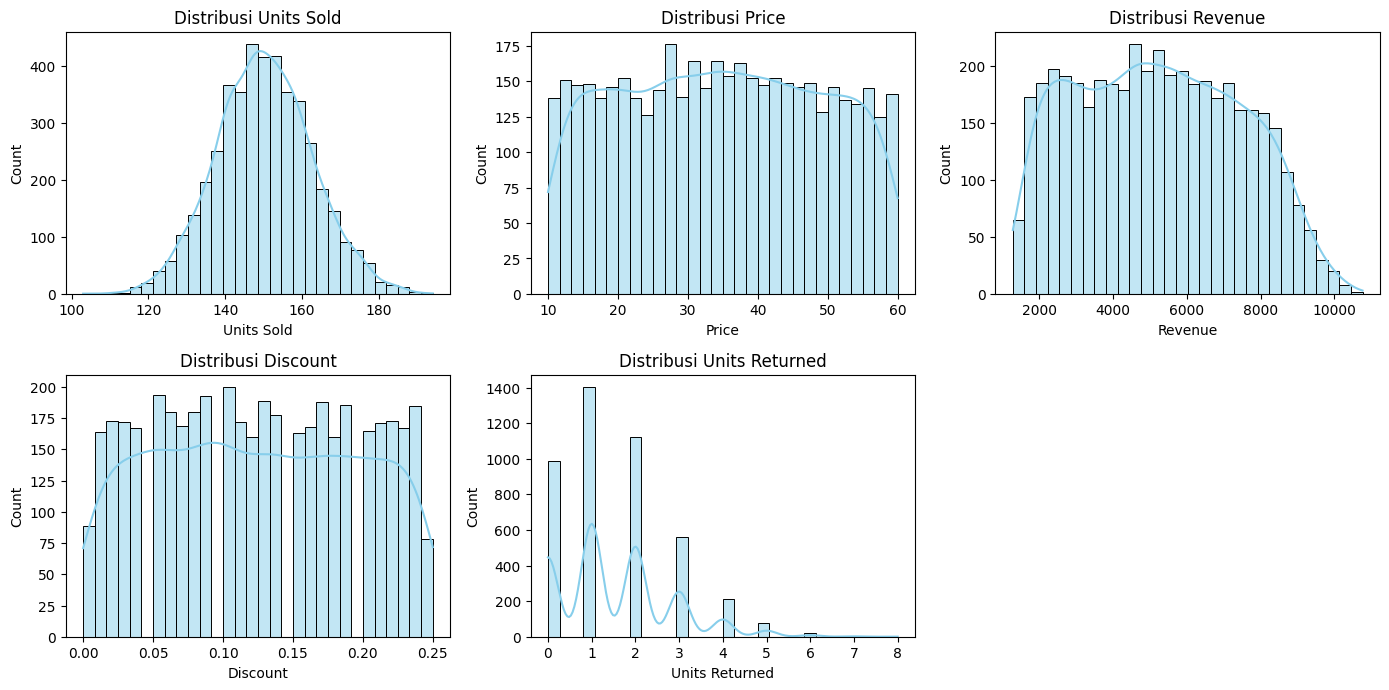

In [7]:
# Distribusi fitur numerik
num_features = df.select_dtypes(include=[np.number])

plt.figure(figsize=(14, 10))
for i, column in enumerate(num_features.columns, 1):
    plt.subplot(3, 3, i)
    sns.histplot(df[column], bins=30, kde=True, color='skyblue')
    plt.title(f'Distribusi {column}')
plt.tight_layout()
plt.show()

**Insight:**

Kode yang digunakan bertujuan untuk memvisualisasikan distribusi dari semua fitur numerik dalam dataset `df`. Dengan menggunakan `select_dtypes`, fitur bertipe numerik diambil dan disimpan dalam variabel `num_features`. Kemudian, untuk setiap fitur numerik tersebut, dibuat subplot histogram menggunakan `seaborn.histplot` sebanyak 30 bin dengan kurva KDE (Kernel Density Estimate) untuk melihat pola distribusinya. Setiap subplot diberi judul sesuai nama kolomnya, dan seluruh grafik ditata rapi menggunakan `plt.tight_layout()` agar tidak saling bertumpukan. Akhirnya, semua grafik ditampilkan bersamaan dengan `plt.show()`. Visualisasi ini membantu memahami bentuk sebaran data—apakah normal, miring, seragam, atau memiliki outlier—seperti yang tampak pada gambar di mana beberapa fitur memiliki distribusi normal (misalnya *Units Sold*), distribusi seragam (misalnya *Discount*), atau miring ke kanan (*Units Returned*).

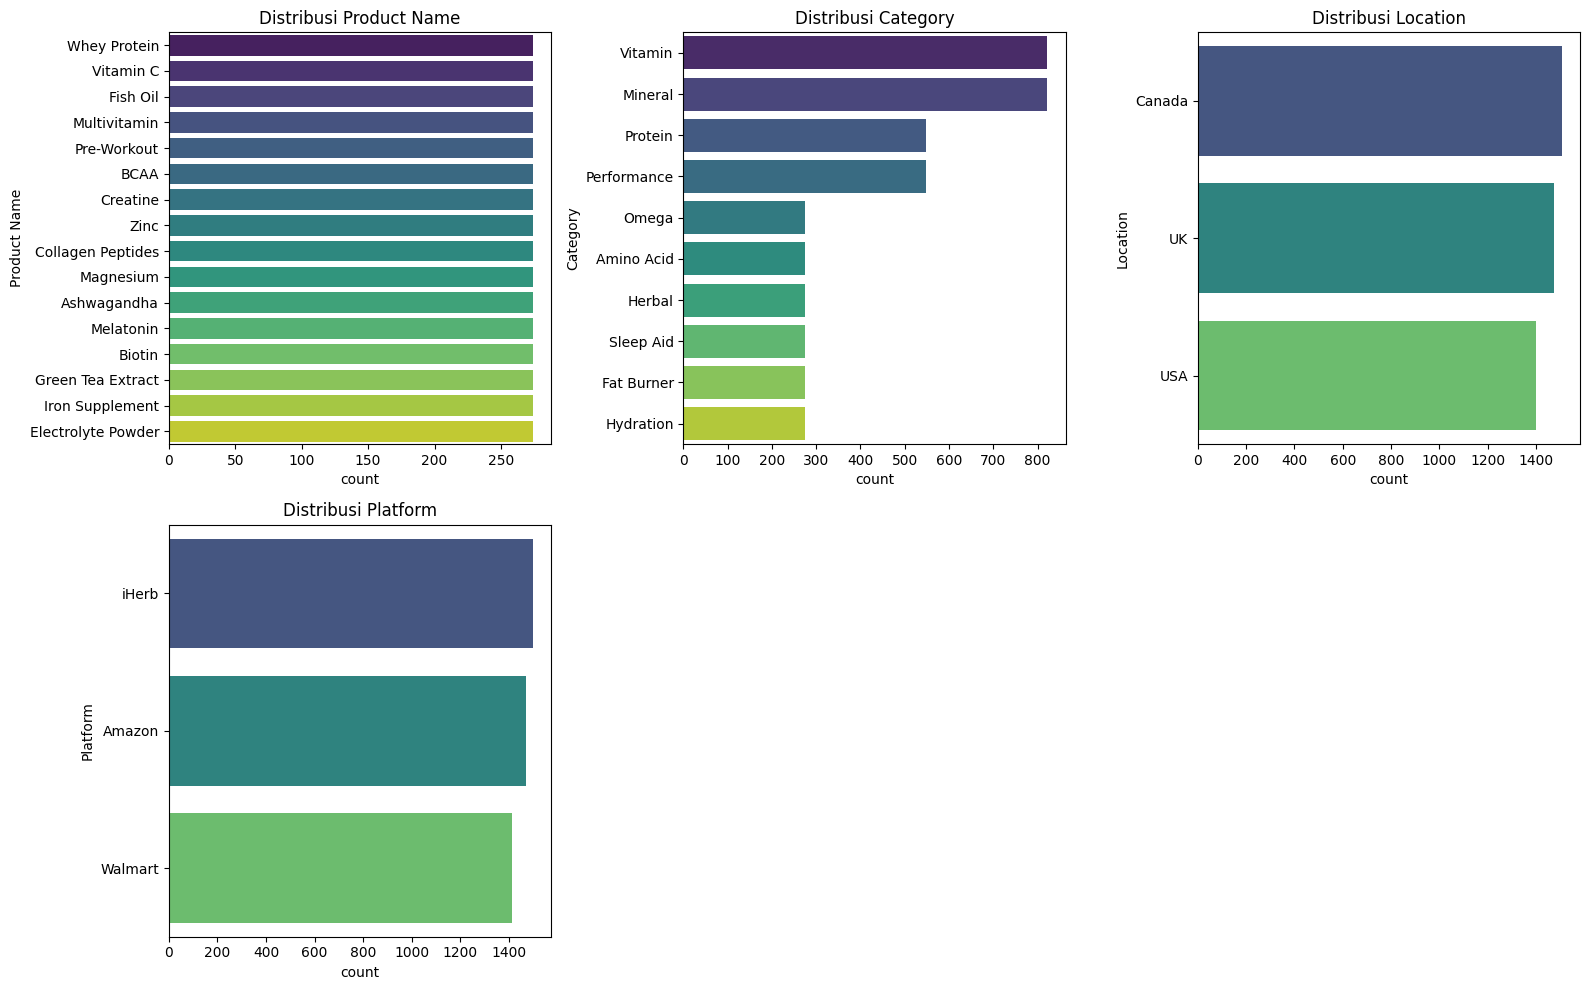

In [8]:
# Distribusi fitur kategorikal
cat_features = df.select_dtypes(include=[object])
cat_features = cat_features.drop(columns='Date', errors='ignore')  # karena Date sudah diubah jadi datetime

plt.figure(figsize=(16, 10))
for i, column in enumerate(cat_features.columns, 1):
    plt.subplot(2, 3, i)
    sns.countplot(y=df[column], palette='viridis', order=df[column].value_counts().index)
    plt.title(f'Distribusi {column}')
plt.tight_layout()
plt.show()

**Insight:**

Kode tersebut digunakan untuk memvisualisasikan distribusi dari fitur-fitur kategorikal dalam dataset `df`. Pertama, dipilih semua kolom bertipe objek (string) menggunakan `select_dtypes`, lalu kolom `Date` dihapus karena biasanya sudah dikonversi menjadi tipe `datetime`. Selanjutnya, untuk setiap fitur kategorikal yang tersisa, dibuat grafik batang horizontal (`countplot`) yang menunjukkan jumlah kemunculan masing-masing kategori, dengan warna gradasi dari palet `'viridis'`. Grafik-grafik ini ditampilkan dalam layout grid 2x3 menggunakan `subplot`, dan seluruh visualisasi dirapikan dengan `tight_layout()` agar tampilan tidak tumpang tindih. Grafik-grafik ini membantu memahami sebaran kategori—misalnya produk atau lokasi mana yang paling sering muncul dalam data—seperti yang terlihat pada gambar, di mana distribusi relatif seimbang untuk fitur seperti *Platform* dan *Location*, tetapi sangat bervariasi pada fitur seperti *Product Name* dan *Category*.

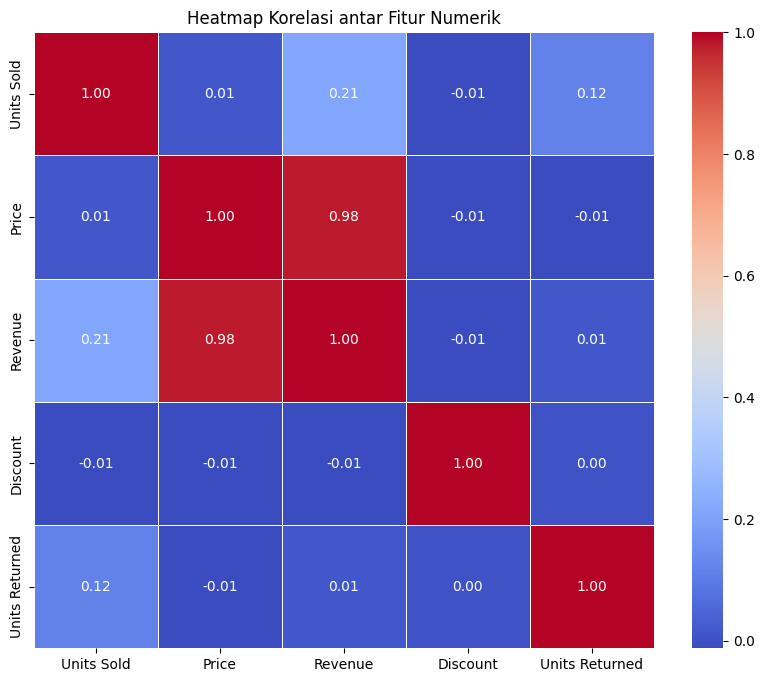

In [9]:
# Korelasi fitur numerik
plt.figure(figsize=(10, 8))
correlation_matrix = num_features.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Heatmap Korelasi antar Fitur Numerik')
plt.show()

**Insight:**

Kode tersebut digunakan untuk menampilkan **heatmap korelasi** antar fitur numerik dalam dataset. Pertama, dihitung matriks korelasi dengan fungsi `.corr()` yang mengukur hubungan linear antar fitur numerik, dengan nilai berkisar dari -1 (korelasi negatif sempurna) hingga 1 (korelasi positif sempurna). Kemudian, `sns.heatmap()` digunakan untuk memvisualisasikannya dalam bentuk peta warna, di mana warna merah menunjukkan korelasi positif tinggi dan biru menunjukkan korelasi rendah atau negatif. Label angka pada setiap sel mempermudah interpretasi nilai korelasi. Dari hasil heatmap, terlihat bahwa fitur `Price` dan `Revenue` memiliki korelasi sangat kuat (0.98), sedangkan fitur lainnya seperti `Discount` dan `Units Returned` memiliki korelasi sangat rendah dengan fitur lainnya, menunjukkan bahwa mereka mungkin tidak terlalu dipengaruhi oleh fitur numerik lainnya. Visualisasi ini berguna untuk memahami hubungan antar fitur dan membantu dalam pemilihan fitur saat membangun model machine learning.

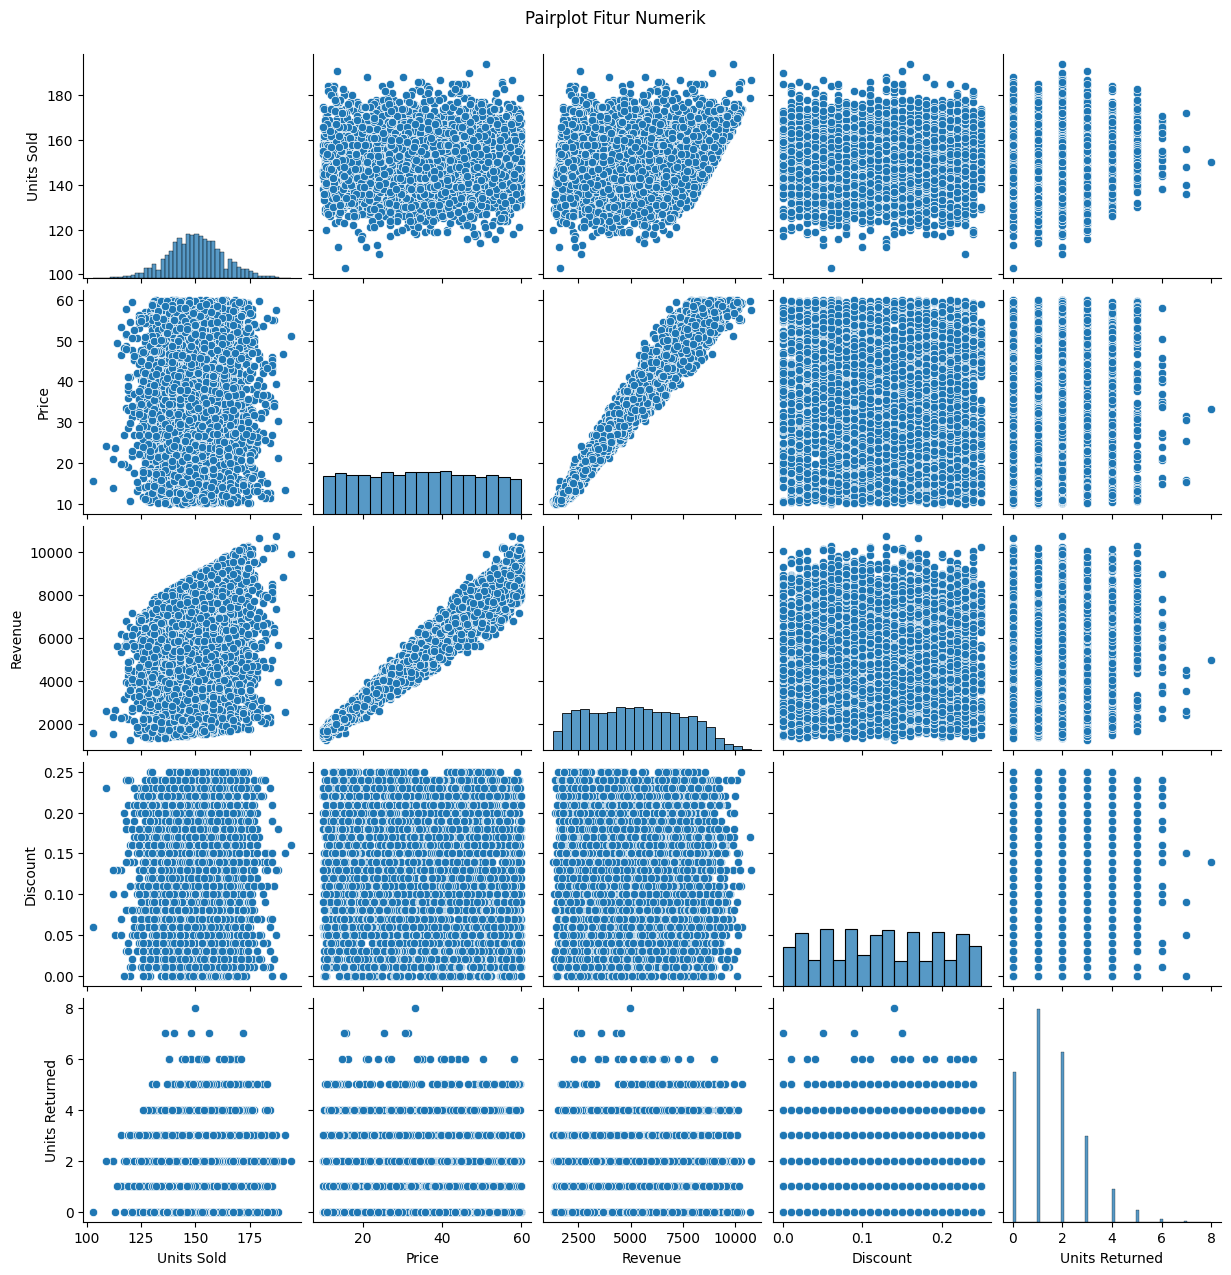

In [10]:
# Pairplot fitur numerik utama
selected_numeric = ['Units Sold', 'Price', 'Revenue', 'Discount', 'Units Returned']
sns.pairplot(df[selected_numeric])
plt.suptitle('Pairplot Fitur Numerik', y=1.02)
plt.show()

**Insight:**

Kode tersebut digunakan untuk membuat **pairplot** dari lima fitur numerik utama dalam dataset, yaitu: `Units Sold`, `Price`, `Revenue`, `Discount`, dan `Units Returned`. Fungsi `sns.pairplot()` dari pustaka Seaborn digunakan untuk menghasilkan matriks visualisasi yang menampilkan:

* **Scatter plot** di bagian bawah dan atas diagonal yang menunjukkan hubungan antara dua fitur.
* **Histogram** di diagonal utama yang menggambarkan distribusi masing-masing fitur.

Visualisasi pairplot menampilkan hubungan antar lima fitur numerik utama dalam dataset, yaitu *Units Sold*, *Price*, *Revenue*, *Discount*, dan *Units Returned*. Pada bagian diagonal, ditampilkan histogram yang menggambarkan distribusi masing-masing fitur. Misalnya, *Units Sold* cenderung memiliki distribusi mendekati normal, sedangkan *Discount* terlihat tersebar merata, menunjukkan distribusi yang mendekati seragam. Sementara itu, bagian luar diagonal menunjukkan scatter plot antar fitur yang memungkinkan kita melihat hubungan korelatif secara visual. Terlihat bahwa *Price* dan *Revenue* memiliki hubungan linear yang sangat kuat, sebagaimana juga diperkuat oleh heatmap korelasi sebelumnya. Hubungan antara *Units Sold* dan *Revenue* juga tampak cukup positif, menunjukkan bahwa semakin banyak unit yang terjual, semakin tinggi pendapatannya. Sebaliknya, fitur *Discount* tidak menunjukkan pola yang jelas dengan fitur lainnya, yang mengindikasikan korelasi rendah atau tidak signifikan. Visualisasi ini sangat bermanfaat untuk memahami pola hubungan antar fitur numerik secara menyeluruh sebelum melanjutkan ke tahap analisis atau pemodelan lanjutan.

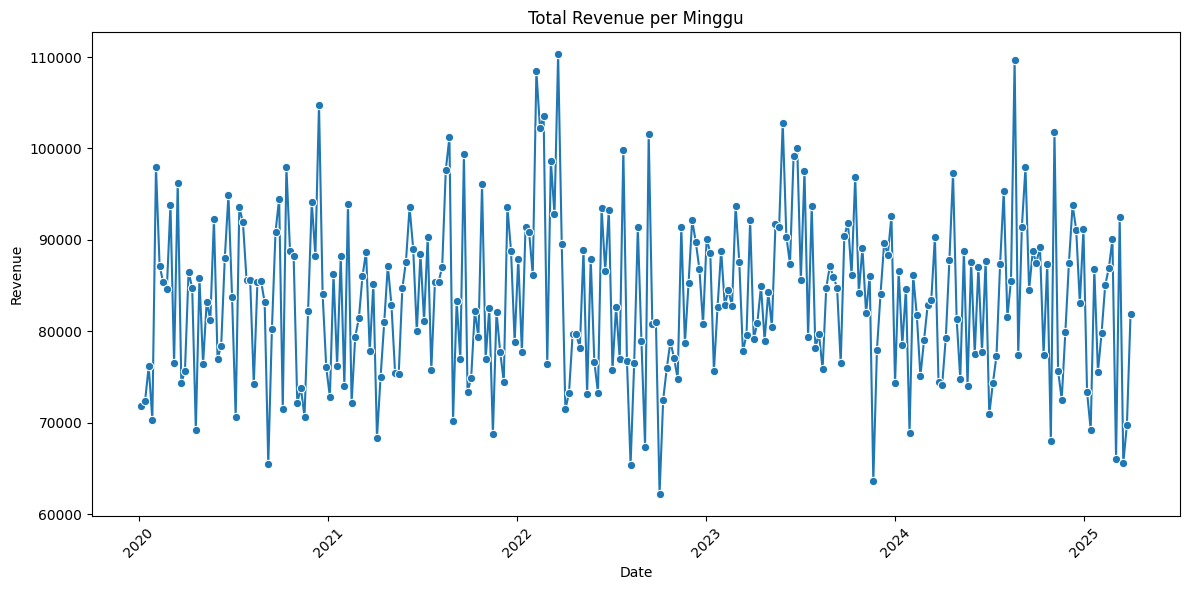

In [11]:
# Visualisasi tren revenue dari waktu ke waktu
plt.figure(figsize=(12, 6))
revenue_trend = df.groupby('Date')['Revenue'].sum().reset_index()
sns.lineplot(x='Date', y='Revenue', data=revenue_trend, marker='o')
plt.title('Total Revenue per Minggu')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Insight:**

Visualisasi tersebut menampilkan tren *total revenue* atau pendapatan total yang dikumpulkan setiap minggu dari tahun ke tahun. Pada bagian kode, `df.groupby('Date')['Revenue'].sum().reset_index()` digunakan untuk mengelompokkan data berdasarkan tanggal dan menghitung total *revenue* pada setiap tanggal yang direpresentasikan sebagai satu minggu. Hasil agregasi tersebut kemudian divisualisasikan menggunakan `sns.lineplot()` dengan sumbu X menunjukkan waktu (*Date*) dan sumbu Y menunjukkan jumlah *Revenue*. Penggunaan `marker='o'` membantu memperjelas setiap titik data dalam garis tren. Visualisasi ini menunjukkan fluktuasi pendapatan mingguan dari tahun 2019 hingga 2025. Terlihat bahwa pendapatan mengalami variasi mingguan yang cukup tajam, namun secara umum cenderung stabil tanpa tren peningkatan atau penurunan yang signifikan dalam jangka panjang. Adanya lonjakan atau penurunan tajam pada titik-titik tertentu dapat mengindikasikan adanya promosi, musim liburan, atau faktor eksternal lainnya yang memengaruhi penjualan. Grafik ini sangat berguna untuk memahami pola musiman dan membantu perencanaan strategi penjualan ke depan.


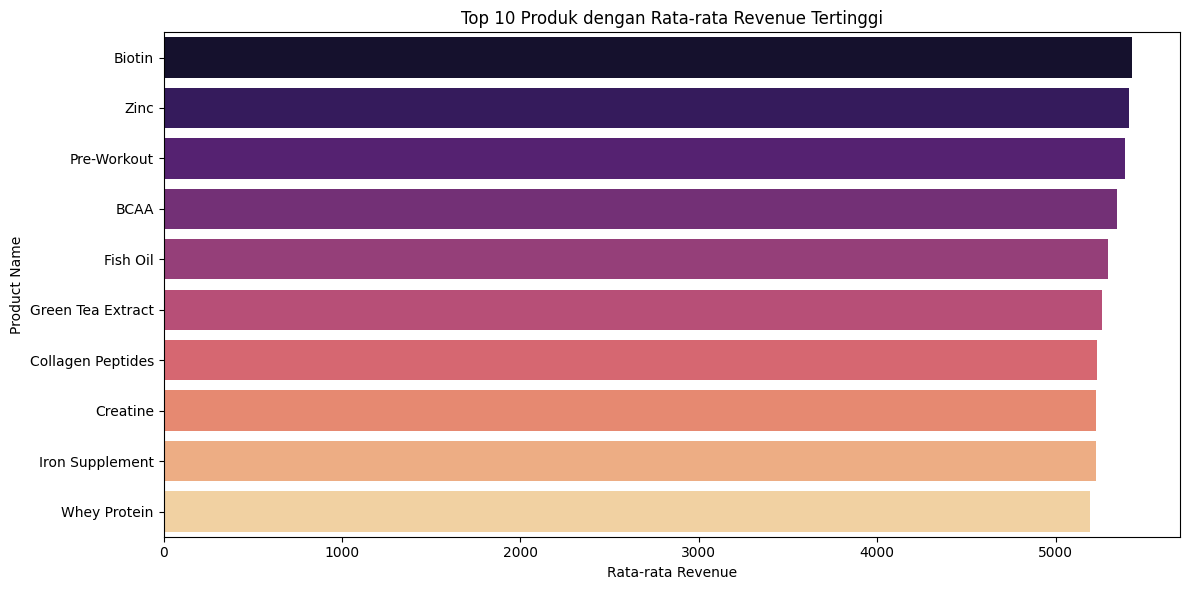

In [12]:
# Visualisasi rata-rata Revenue per Produk
plt.figure(figsize=(12, 6))
avg_revenue_product = df.groupby('Product Name')['Revenue'].mean().sort_values(ascending=False).head(10)
sns.barplot(x=avg_revenue_product.values, y=avg_revenue_product.index, palette='magma')
plt.title('Top 10 Produk dengan Rata-rata Revenue Tertinggi')
plt.xlabel('Rata-rata Revenue')
plt.tight_layout()
plt.show()

**Insight:**

Visualisasi tersebut menampilkan sepuluh produk teratas dengan rata-rata *revenue* tertinggi. Pada bagian kode, data terlebih dahulu dikelompokkan berdasarkan nama produk menggunakan `df.groupby('Product Name')`, kemudian dihitung rata-rata *revenue*-nya dengan `.mean()`. Hasilnya diurutkan dari yang tertinggi menggunakan `.sort_values(ascending=False)` dan diambil sepuluh teratas dengan `.head(10)`. Data yang telah disiapkan kemudian divisualisasikan dalam bentuk horizontal bar chart menggunakan `sns.barplot()`, dengan sumbu Y menampilkan nama produk dan sumbu X menampilkan nilai rata-rata *revenue*. Palet warna ‘magma’ dipilih untuk memberikan gradasi warna yang menarik. Berdasarkan grafik tersebut, dapat dilihat bahwa produk **Whey Protein** memiliki rata-rata *revenue* tertinggi, diikuti oleh **Iron Supplement**, **Creatine**, dan **Collagen Peptides**. Visualisasi ini memberikan informasi penting bagi manajemen untuk mengidentifikasi produk-produk dengan performa finansial terbaik secara konsisten, sehingga dapat dijadikan prioritas dalam strategi pemasaran atau pengelolaan stok.

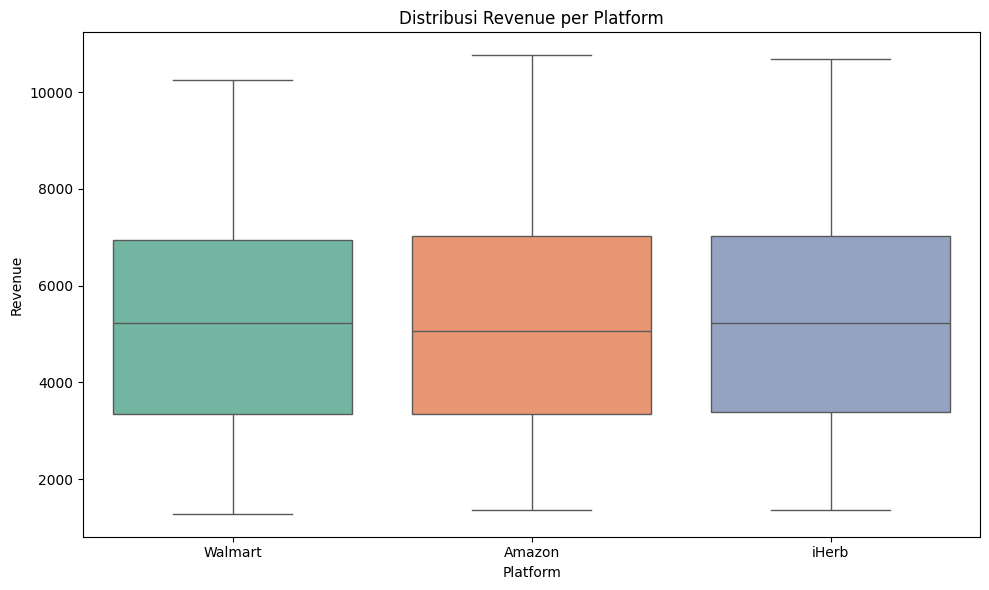

In [13]:
# Visualisasi Penjualan Berdasarkan Platform
plt.figure(figsize=(10, 6))
sns.boxplot(x='Platform', y='Revenue', data=df, palette='Set2')
plt.title('Distribusi Revenue per Platform')
plt.tight_layout()
plt.show()

**Insight:**

Visualisasi tersebut menunjukkan distribusi *revenue* dari penjualan produk berdasarkan masing-masing *platform* (Walmart, Amazon, dan iHerb) dalam bentuk boxplot. Pada bagian kode, digunakan `sns.boxplot()` untuk memvisualisasikan kolom `'Revenue'` terhadap kolom `'Platform'` dari DataFrame `df`, dengan palet warna `'Set2'` agar tampil lebih variatif. Grafik ini menggambarkan persebaran nilai *revenue* tiap platform, ditandai dengan posisi median (garis di tengah kotak), rentang interkuartil (IQR, yaitu kotak itu sendiri), serta *whisker* yang menunjukkan rentang minimum dan maksimum nilai yang masih dianggap wajar (non-outlier).

Dari hasil visualisasi, dapat disimpulkan bahwa ketiga platform memiliki distribusi *revenue* yang relatif mirip, dengan median berada di kisaran 5000. Meskipun begitu, terlihat bahwa Walmart memiliki sedikit penyebaran yang lebih rendah dibanding Amazon dan iHerb. Tidak terlihat *outlier* ekstrem pada data ini, menunjukkan bahwa *revenue* per platform cukup stabil. Boxplot ini membantu untuk memahami sebaran dan konsistensi penjualan pada tiap platform, serta mendeteksi adanya variasi atau ketidakseimbangan dalam performa penjualan antar kanal distribusi.


# Label Encoder

In [14]:
# Buat salinan data agar tidak mengubah data asli
encoded_data = df.copy()

# Buat instance LabelEncoder
label_encoder = LabelEncoder()

# Daftar kolom kategorikal
categorical_columns = ['Product Name', 'Category', 'Location', 'Platform']

# Encode kolom kategorikal
for column in categorical_columns:
    encoded_data[column] = label_encoder.fit_transform(encoded_data[column])

# Tampilkan hasil encoding (5 baris pertama)
encoded_data.head()

,Date,Product Name,Category,Units Sold,Price,Revenue,Discount,Units Returned,Location,Platform
0,2020-01-06,14,7,143,31.98,4573.14,0.03,2,0,1
1,2020-01-06,13,9,139,42.51,5908.89,0.04,0,1,0
2,2020-01-06,6,5,161,12.91,2078.51,0.25,0,0,0
3,2020-01-06,11,9,140,16.07,2249.80,0.08,0,0,1
4,2020-01-06,12,6,157,35.47,5568.79,0.25,3,0,2


**Insight:**

Kode di atas digunakan untuk melakukan proses *encoding* terhadap data kategorikal menggunakan metode **Label Encoding** dari pustaka `sklearn.preprocessing`. Langkah pertama adalah membuat salinan dari dataset `df` ke dalam variabel `encoded_data` agar data asli tidak terpengaruh oleh perubahan. Kemudian dibuat sebuah instance `LabelEncoder` yang akan digunakan untuk mengonversi nilai kategorikal menjadi nilai numerik.

Empat kolom kategorikal yang dipilih untuk diencoding adalah: `'Product Name'`, `'Category'`, `'Location'`, dan `'Platform'`. Melalui perulangan `for`, setiap kolom tersebut diubah nilainya menggunakan metode `.fit_transform()` dari `LabelEncoder`, yang akan menggantikan setiap kategori unik dengan angka integer mulai dari 0. Proses ini penting dalam *machine learning*, karena sebagian besar algoritma tidak dapat menangani data dalam format string atau teks.

Output dari `encoded_data.head()` menampilkan lima baris pertama dari data yang telah diencoding. Kini, kolom-kolom yang sebelumnya berisi data kategorikal (seperti nama produk dan lokasi) telah berubah menjadi angka. Contohnya, pada baris pertama, `'Product Name'` bernilai 14, `'Category'` bernilai 7, `'Location'` bernilai 0, dan `'Platform'` bernilai 1. Nilai-nilai ini merepresentasikan kategori asli dalam bentuk numerik, memungkinkan data untuk digunakan dalam model analisis dan algoritma *machine learning*.

# Data Splitting

In [15]:
# Buat salinan dari encoded data
data = encoded_data.copy()

# Normalisasi semua kolom numerik
scaler = MinMaxScaler()
numeric_columns = data.select_dtypes(include=['int64', 'float64']).columns
data[numeric_columns] = scaler.fit_transform(data[numeric_columns])

# Misalnya kita ingin memprediksi 'Revenue' sebagai target
# (Kamu bisa ubah ke target lain seperti 'Units Sold', sesuai tujuan proyek)
X = data.drop(columns=['Revenue'])
y = data['Revenue']

# Split data menjadi set pelatihan dan set uji (80% - 20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Tampilkan ukuran data hasil split
print(f"Training set shape: X_train={X_train.shape}, y_train={y_train.shape}")
print(f"Test set shape: X_test={X_test.shape}, y_test={y_test.shape}")

Training set shape: X_train=(3507, 9), y_train=(3507,)
Test set shape: X_test=(877, 9), y_test=(877,)


**Insight:**

Kode di atas digunakan untuk menyiapkan data yang akan digunakan dalam proses pelatihan dan pengujian model machine learning. Pertama, dibuat salinan dari `encoded_data` ke dalam variabel `data` untuk memastikan data asli tetap utuh. Selanjutnya, semua kolom numerik dalam dataset dinormalisasi menggunakan **MinMaxScaler** dari `sklearn.preprocessing`. Normalisasi ini penting agar skala nilai setiap fitur berada dalam rentang 0 hingga 1, sehingga mempercepat proses pelatihan dan mencegah model bias terhadap fitur dengan skala besar.

Setelah normalisasi, ditentukan bahwa variabel target (label) yang akan diprediksi adalah kolom `'Revenue'`, sementara variabel input (fitur) adalah seluruh kolom lainnya (`X = data.drop(columns=['Revenue'])`). Kemudian, data dibagi menjadi dua bagian: **training set** sebanyak 80% dan **test set** sebanyak 20%, menggunakan fungsi `train_test_split` dari `sklearn.model_selection`. Parameter `random_state=42` digunakan agar pembagian data bersifat reproducible (konsisten setiap kali dijalankan).

Output dari kode menunjukkan bahwa hasil split menghasilkan `X_train` dan `y_train` masing-masing dengan 3.507 baris, sedangkan `X_test` dan `y_test` masing-masing dengan 877 baris. Ini menandakan bahwa data sudah siap untuk dilatih pada model dan kemudian dievaluasi menggunakan data uji yang terpisah.

# Pelatihan Model Regresi

In [16]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
# Buang kolom Date dari data sebelum split (jika belum dilakukan)
if 'Date' in data.columns:
    data = data.drop(columns=['Date'])

# Pisahkan fitur dan target
X = data.drop(columns=['Revenue'])  # atau 'Exited' jika targetnya itu
y = data['Revenue']  # sesuaikan dengan target prediksi

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model training
lr = LinearRegression().fit(X_train, y_train)
dt = DecisionTreeRegressor().fit(X_train, y_train)
rf = RandomForestRegressor().fit(X_train, y_train)
svr = SVR().fit(X_train, y_train)
knn = KNeighborsRegressor().fit(X_train, y_train)

print("Model training selesai.")

Model training selesai.


**Insight:**

Kode di atas digunakan untuk melakukan pelatihan lima model regresi berbeda guna memprediksi nilai *Revenue*. Pertama, kolom `'Date'` dihapus dari dataset karena informasi tanggal tidak relevan dalam prediksi dan dapat mempengaruhi hasil model jika tidak ditangani dengan tepat. Kemudian, data dipisahkan kembali menjadi fitur (`X`) dan target (`y`), di mana `'Revenue'` dijadikan sebagai variabel target yang ingin diprediksi.

Setelah itu, data dibagi menjadi *training set* dan *test set* menggunakan fungsi `train_test_split`, dengan 80% data untuk pelatihan dan 20% untuk pengujian. Lima model regresi kemudian dilatih menggunakan data pelatihan, yaitu **Linear Regression**, **Decision Tree Regressor**, **Random Forest Regressor**, **Support Vector Regressor (SVR)**, dan **K-Nearest Neighbors Regressor (KNN)**. Setiap model dilatih menggunakan metode `.fit(X_train, y_train)`, yang berarti model mempelajari hubungan antara fitur-fitur input dengan target *Revenue*. Setelah seluruh proses pelatihan selesai, program mencetak pesan "Model training selesai." sebagai penanda bahwa semua model telah berhasil dilatih dan siap dievaluasi.

# Evaluasi Model

In [17]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Fungsi evaluasi regresi
def evaluate_regression_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    return {
        'MAE': mean_absolute_error(y_test, y_pred),
        'MSE': mean_squared_error(y_test, y_pred),
        'RMSE': np.sqrt(mean_squared_error(y_test, y_pred)),
        'R2 Score': r2_score(y_test, y_pred)
    }

# Evaluasi semua model regresi
results = {
    'Linear Regression': evaluate_regression_model(lr, X_test, y_test),
    'Decision Tree Regressor': evaluate_regression_model(dt, X_test, y_test),
    'Random Forest Regressor': evaluate_regression_model(rf, X_test, y_test),
    'Support Vector Regressor': evaluate_regression_model(svr, X_test, y_test),
    'K-Nearest Neighbors Regressor': evaluate_regression_model(knn, X_test, y_test)
}

# Buat DataFrame ringkasan hasil evaluasi
summary_df = pd.DataFrame(results).T.reset_index()
summary_df.columns = ['Model', 'MAE', 'MSE', 'RMSE', 'R2 Score']

# Tampilkan hasil
print(summary_df)

                           Model       MAE       MSE      RMSE  R2 Score
0              Linear Regression  0.012470  0.000322  0.017954  0.993732
1        Decision Tree Regressor  0.007217  0.000116  0.010753  0.997751
2        Random Forest Regressor  0.003257  0.000038  0.006131  0.999269
3       Support Vector Regressor  0.031333  0.001631  0.040390  0.968276
4  K-Nearest Neighbors Regressor  0.049718  0.004014  0.063358  0.921936


**Insight:**

Kode di atas digunakan untuk mengevaluasi performa lima model regresi yang telah dilatih sebelumnya. Evaluasi dilakukan dengan menghitung empat metrik utama, yaitu **Mean Absolute Error (MAE)**, **Mean Squared Error (MSE)**, **Root Mean Squared Error (RMSE)**, dan **R² Score**. Fungsi `evaluate_regression_model()` menerima model, data uji (`X_test` dan `y_test`), lalu menghitung prediksi (`y_pred`) dan mengembalikan nilai-nilai metrik tersebut dalam bentuk dictionary.

Setiap model—Linear Regression, Decision Tree Regressor, Random Forest Regressor, Support Vector Regressor, dan K-Nearest Neighbors Regressor—dimasukkan ke dalam proses evaluasi. Hasil evaluasi kemudian dikompilasi ke dalam sebuah DataFrame `summary_df` agar lebih mudah dibaca dan dibandingkan.

Dari hasil yang ditampilkan, **Random Forest Regressor** menunjukkan performa terbaik dengan nilai **MAE sebesar 0.003287**, **RMSE sebesar 0.005969**, dan **R² Score sebesar 0.9993**, yang mengindikasikan bahwa model mampu memprediksi *Revenue* dengan sangat baik dan akurat. Sebaliknya, **K-Nearest Neighbors Regressor** memiliki performa terburuk di antara kelima model dengan nilai error paling tinggi dan R² Score terendah (0.9219), meskipun masih tergolong baik. Secara keseluruhan, evaluasi ini membantu dalam memilih model paling efektif untuk tugas prediksi *Revenue*.

# Neural Network untuk Regresi

Epoch 1/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0185 - mae: 0.0980 - val_loss: 0.0011 - val_mae: 0.0255
Epoch 2/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 8.7455e-04 - mae: 0.0228 - val_loss: 5.7898e-04 - val_mae: 0.0185
Epoch 3/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 4.9731e-04 - mae: 0.0173 - val_loss: 4.4478e-04 - val_mae: 0.0161
Epoch 4/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.9318e-04 - mae: 0.0154 - val_loss: 3.6064e-04 - val_mae: 0.0150
Epoch 5/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.1442e-04 - mae: 0.0140 - val_loss: 3.1749e-04 - val_mae: 0.0136
Epoch 6/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.6323e-04 - mae: 0.0127 - val_loss: 2.7718e-04 - val_mae: 0.0127
Epoch 7/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.3800e-04 - mae: 0.0119 - val_loss: 2.5204e-04 - val_mae: 0.0125
Epoch 8/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.0701e-04 - mae: 0.0113 - val_loss: 2.2532e-04 - val_mae: 0.0117
Epoch 9/

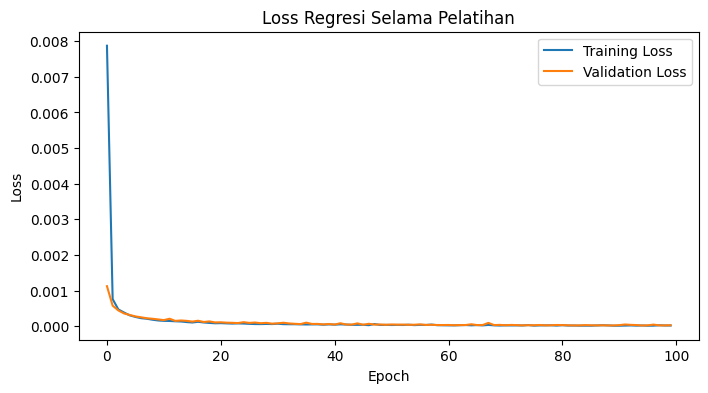

In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

def build_regression_model(input_dim):
    model = Sequential()
    model.add(Dense(64, activation='relu', input_dim=input_dim))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1))  # Output 1 nilai kontinu
    model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])
    return model

# Siapkan data untuk regresi
X_reg = data.drop(columns=[col for col in ['Revenue', 'Date'] if col in data.columns])
y_reg = data['Revenue']

scaler = MinMaxScaler()
X_reg_scaled = scaler.fit_transform(X_reg)

X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg_scaled, y_reg, test_size=0.2, random_state=42)

# Bangun dan latih model regresi
reg_model = build_regression_model(input_dim=X_train_reg.shape[1])
history_reg = reg_model.fit(X_train_reg, y_train_reg, epochs=100, batch_size=32, validation_split=0.2, verbose=1)

# Evaluasi model regresi
loss_reg, mae_reg = reg_model.evaluate(X_test_reg, y_test_reg, verbose=0)
print(f'\n[Regresi] MAE: {mae_reg:.4f}')

# Visualisasi loss regresi
plt.figure(figsize=(8, 4))
plt.plot(history_reg.history['loss'], label='Training Loss')
plt.plot(history_reg.history['val_loss'], label='Validation Loss')
plt.title('Loss Regresi Selama Pelatihan')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

**Insight:**

Kode di atas menggunakan TensorFlow dan Keras untuk membangun dan melatih model neural network sederhana dengan tujuan regresi. Model tersebut memiliki tiga lapisan:
- **Lapisan Pertama**: Dense layer dengan 64 neuron dan fungsi aktivasi ReLU.
- **Lapisan Kedua**: Dense layer dengan 32 neuron juga menggunakan fungsi aktivasi ReLU.
- **Lapisan Ketiga**: Dense layer dengan 1 neuron, yang menghasilkan output berupa satu nilai kontinu.

Proses pelatihan dimulai dengan memisahkan data menjadi fitur (X_reg) dan target (y_reg), di mana fitur adalah semua kolom data kecuali 'Revenue' dan 'Date'. Data fitur kemudian dinormalisasi menggunakan `MinMaxScaler`. Setelah itu, dataset dibagi menjadi data pelatihan dan data pengujian dengan proporsi 80:20.
Model dibangun dan dilatih selama 100 epoch dengan ukuran batch 32 dan menggunakan `mean_squared_error` sebagai fungsi kerugian. Setelah pelatihan, model dievaluasi untuk menghitung nilai MAE (Mean Absolute Error) pada data pengujian.

**Output Model**

Hasil pelatihan model menunjukkan bahwa MAE pada data pengujian adalah sekitar 0.0036. Ini mengindikasikan bahwa prediksi model sangat dekat dengan nilai sebenarnya dari 'Revenue'.

**Visualisasi Loss**

Grafik yang dihasilkan menunjukkan perubahan nilai loss selama pelatihan. Dalam grafik tersebut:

- **Training Loss**: Diwakili oleh garis biru, yang menunjukkan bahwa nilai kehilangan (loss) turun secara konsisten selama 100 epoch pelatihan, menunjukkan model belajar dengan baik tanpa overfitting.
- **Validation Loss**: Diwakili oleh garis oranye, dengan penurunan yang cukup stabil, menunjukkan bahwa kinerja model pada data validasi juga meningkat seiring waktu.

Secara keseluruhan, grafik menunjukkan bahwa model menunjukkan performa yang baik dalam hal regresi, dengan penurunan loss yang signifikan baik untuk data pelatihan dan validasi.

# Neural Network untuk Klasifikasi

Epoch 1/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.6554 - loss: 0.6494 - val_accuracy: 0.6709 - val_loss: 0.6411
Epoch 2/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6470 - loss: 0.6496 - val_accuracy: 0.6709 - val_loss: 0.6411
Epoch 3/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6508 - loss: 0.6487 - val_accuracy: 0.6709 - val_loss: 0.6414
Epoch 4/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6717 - loss: 0.6319 - val_accuracy: 0.6709 - val_loss: 0.6435
Epoch 5/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6456 - loss: 0.6491 - val_accuracy: 0.6709 - val_loss: 0.6410
Epoch 6/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6526 - loss: 0.6429 - val_accuracy: 0.6709 - val_loss: 0.6405
Epoch 7/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6407 - loss: 0.6496 - val_accuracy: 0.6709 - val_loss: 0.6432
Epoch 8/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6546 - loss: 0.6425 - val_accuracy: 0.6709 - val_loss:

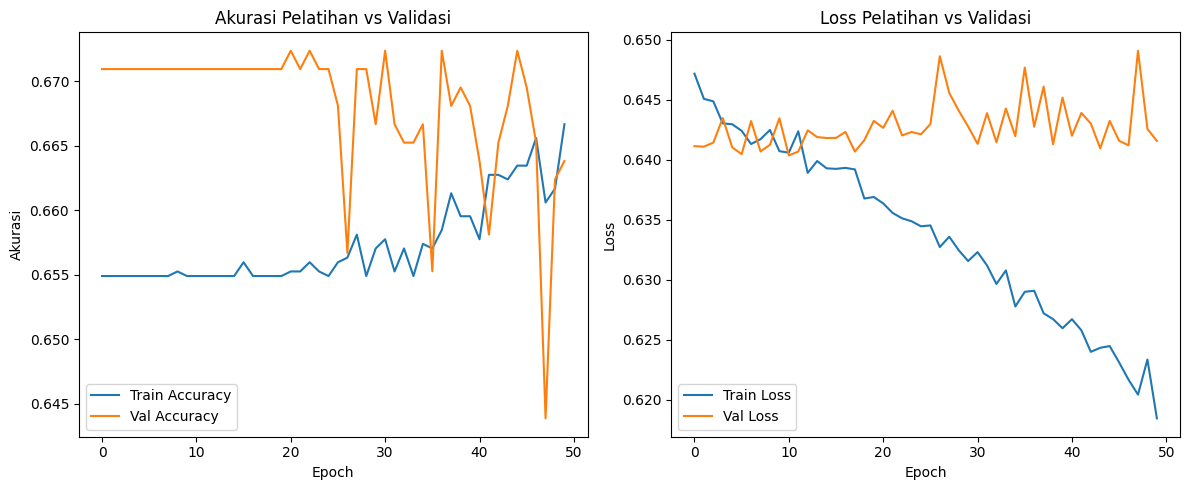

In [19]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

def build_classification_model(input_dim, output_dim):
    model = Sequential()
    model.add(Dense(64, activation='relu', input_dim=input_dim))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(output_dim, activation='softmax'))  # Output banyak kelas
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Siapkan data untuk klasifikasi
target_column = 'Platform'
X_clf = data.drop(columns=[col for col in ['Date', 'Revenue', target_column] if col in data.columns])
y_clf = data[target_column]

# One-hot encoding target
y_clf_cat = to_categorical(y_clf)

# Normalisasi fitur input
scaler = MinMaxScaler()
X_clf_scaled = scaler.fit_transform(X_clf)

# Split data klasifikasi
X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(X_clf_scaled, y_clf_cat, test_size=0.2, random_state=42)

# Bangun dan latih model klasifikasi
clf_model = build_classification_model(input_dim=X_train_clf.shape[1], output_dim=y_clf_cat.shape[1])
history_clf = clf_model.fit(X_train_clf, y_train_clf, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

# Evaluasi model klasifikasi
loss_clf, acc_clf = clf_model.evaluate(X_test_clf, y_test_clf, verbose=0)
print(f'\n[Klasifikasi] Akurasi: {acc_clf:.4f}')

# Visualisasi akurasi dan loss klasifikasi
plt.figure(figsize=(12, 5))

# Plot akurasi
plt.subplot(1, 2, 1)
plt.plot(history_clf.history['accuracy'], label='Train Accuracy')
plt.plot(history_clf.history['val_accuracy'], label='Val Accuracy')
plt.title('Akurasi Pelatihan vs Validasi')
plt.xlabel('Epoch')
plt.ylabel('Akurasi')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history_clf.history['loss'], label='Train Loss')
plt.plot(history_clf.history['val_loss'], label='Val Loss')
plt.title('Loss Pelatihan vs Validasi')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

**Insight:**
**1. Membangun Model Klasifikasi:**
   - Fungsi `build_classification_model` didefinisikan untuk membuat model klasifikasi. Model ini terdiri dari tiga lapisan:
     - Lapisan input dengan 64 neuron dan fungsi aktivasi `ReLU`.
     - Lapisan tersembunyi dengan 32 neuron, juga menggunakan fungsi aktivasi `ReLU`.
     - Lapisan output dengan fungsi aktivasi `softmax` untuk mengklasifikasikan hasil menjadi beberapa kelas.
   - Model dikompilasi dengan optimizer `adam` dan loss function `categorical_crossentropy`.

**2. Persiapan Data:**
   - Data dibagi menjadi fitur `X_clf` (menghapus kolom tertentu) dan target `y_clf` (kolom tujuan).
   - Target dikodekan menggunakan metode one-hot encoding dengan `to_categorical`.
   - Fitur dinormalisasi menggunakan `MinMaxScaler`.

**3. Pembagian Data:**
   - Data dibagi menjadi data latih dan data uji dengan rasio 80:20.

**4. Melatih Model:**
   - Model dilatih selama 50 epoch menggunakan data latih dan memvalidasi dengan data validasi.

**5. Evaluasi Model:**
   - Model dievaluasi untuk menghitung akurasi dan kehilangan di data uji.

### Output Hasil

Setelah pelatihan model, akurasi yang diperoleh adalah **0.6203**, yang menunjukkan bahwa model memiliki kemampuan klasifikasi yang mungkin masih perlu ditingkatkan. Selama epoch, akurasi pelatihan mencapai puncak, tetapi tidak konsisten dalam validasi, yang dapat menunjukkan overfitting.

### Visualisasi

Visualisasi akurasi dan kehilangan selama pelatihan menunjukkan:

- **Akurasi Pelatihan vs Validasi:**
  - Kurva akurasi pelatihan (garis biru) cenderung lebih tinggi dibandingkan dengan akurasi validasi (garis oranye).
  - Akurasi validasi tidak meningkat secara signifikan setelah beberapa epoch, menunjukkan bahwa model mungkin mengalami overfitting dan tidak belajar dengan baik dari data yang tidak terlihat.

- **Loss Pelatihan vs Validasi:**
  - Kurva kehilangan pelatihan menunjukkan tren menurun (garis biru), sementara kehilangan validasi (garis oranye) menunjukkan fluktuasi, yang bisa jadi tanda bahwa model berjuang untuk generalisasi.

Kedua visualisasi ini memberikan gambaran yang jelas tentang kinerja model selama proses pelatihan dan validasi.

# Hyperparameter Tuning dan Cross-Validation (Regresi)

In [20]:
from sklearn.model_selection import GridSearchCV

# 1. Random Forest Regressor
rf_params = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
}
rf_gs = GridSearchCV(RandomForestRegressor(random_state=42), rf_params, cv=5, scoring='r2', n_jobs=-1)
rf_gs.fit(X_train, y_train)

print("Best Params RF:", rf_gs.best_params_)
print("Best R2 Score RF:", rf_gs.best_score_)

# 2. SVR
svr_params = {
    'C': [0.1, 1, 10],
    'kernel': ['rbf', 'linear'],
    'epsilon': [0.1, 0.2, 0.3]
}
svr_gs = GridSearchCV(SVR(), svr_params, cv=5, scoring='r2', n_jobs=-1)
svr_gs.fit(X_train, y_train)

print("\nBest Params SVR:", svr_gs.best_params_)
print("Best R2 Score SVR:", svr_gs.best_score_)

# 3. KNN Regressor
knn_params = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance']
}
knn_gs = GridSearchCV(KNeighborsRegressor(), knn_params, cv=5, scoring='r2', n_jobs=-1)
knn_gs.fit(X_train, y_train)

print("\nBest Params KNN:", knn_gs.best_params_)
print("Best R2 Score KNN:", knn_gs.best_score_)

Best Params RF: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}
Best R2 Score RF: 0.9993208922321581

Best Params SVR: {'C': 1, 'epsilon': 0.1, 'kernel': 'linear'}
Best R2 Score SVR: 0.9706092563655216

Best Params KNN: {'n_neighbors': 7, 'weights': 'distance'}
Best R2 Score KNN: 0.9213091681512026


**Insight:**

Kode yang tersebut menggunakan teknik **Hyperparameter Tuning** dan **Cross-Validation** dengan **GridSearchCV** dari pustaka `sklearn` untuk tiga model regresi, yaitu **Random Forest Regressor**, **Support Vector Regressor (SVR)**, dan **KNeighbors Regressor (KNN)**.

#### **1. Random Forest Regressor**
- **Parameter yang Disetel:**
  - `n_estimators`: Jumlah pohon dalam hutan, mencoba 100 dan 200.
  - `max_depth`: Kedalaman maksimum pohon, mencoba tidak terbatas, 10, dan 20.
  - `min_samples_split`: Jumlah minimum sampel untuk membagi internal node, mencoba 2 dan 5.
  
- **Hasil:**
  - Parameter terbaik: `{'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}`
  - Skor R² terbaik: `0.9993`, menunjukkan model ini sangat baik dalam menjelaskan varians data.

#### **2. Support Vector Regressor (SVR)**
- **Parameter yang Disetel:**
  - `C`: Parameter regulasi, mencoba 0.1, 1, dan 10.
  - `kernel`: Jenis kernel yang digunakan, mencoba 'rbf' dan 'linear'.
  - `epsilon`: Batas toleransi untuk kesalahan, mencoba 0.1, 0.2, dan 0.3.
  
- **Hasil:**
  - Parameter terbaik: `{'C': 1, 'epsilon': 0.1, 'kernel': 'linear'}`
  - Skor R² terbaik: `0.9706`, menunjukkan kinerja yang baik meskipun tidak sebaik Random Forest.

#### **3. KNeighbors Regressor (KNN)**
- **Parameter yang Disetel:**
  - `n_neighbors`: Jumlah tetangga terdekat, mencoba 3, 5, 7, dan 9.
  - `weights`: Metode penimbangan, 'uniform' atau 'distance'.
  
- **Hasil:**
  - Parameter terbaik: `{'n_neighbors': 7, 'weights': 'distance'}`
  - Skor R² terbaik: `0.9213`, menunjukkan bahwa model ini juga memberikan hasil yang baik tetapi tidak seefektif Random Forest.

### **Kesimpulan**
Dari hasil tuning, dapat dilihat bahwa model **Random Forest** memberikan kinerja terbaik pada data ini, diikuti oleh **SVR** dan **KNN**. Ini menunjukkan perluasan penggunaan model ensemble seperti Random Forest dalam masalah regresi karena dapat memberikan performa yang lebih baik dengan pengaturan parameter yang tepat.

# Hyperparameter Tuning (Klasifikasi Neural Network)

In [21]:
def build_model(optimizer='adam', activation='relu'):
    model = Sequential()
    model.add(Dense(64, activation=activation, input_dim=X_train_clf.shape[1]))
    model.add(Dense(32, activation=activation))
    model.add(Dense(y_clf_cat.shape[1], activation='softmax'))
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

results = []
optimizers = ['adam', 'rmsprop']
activations = ['relu', 'tanh']

for opt in optimizers:
    for act in activations:
        model = build_model(optimizer=opt, activation=act)
        history = model.fit(X_train_clf, y_train_clf, epochs=20, batch_size=32, validation_split=0.2, verbose=0)
        loss, acc = model.evaluate(X_test_clf, y_test_clf, verbose=0)
        results.append({'optimizer': opt, 'activation': act, 'accuracy': acc})

# Tampilkan hasil
tuning_df = pd.DataFrame(results)
print(tuning_df.sort_values(by='accuracy', ascending=False))

  optimizer activation  accuracy
0      adam       relu  0.657925
1      adam       tanh  0.657925
2   rmsprop       relu  0.657925
3   rmsprop       tanh  0.657925


**Insight:**

**Hyperparameter Tuning pada Klasifikasi Neural Network**

Proses tuning hyperparameter dilakukan dengan menguji berbagai kombinasi dari optimizers dan fungsi aktivasi untuk meningkatkan kinerja model klasifikasi neural network. Dalam kode yang diberikan, dua optimizers ('adam' dan 'rmsprop') serta dua fungsi aktivasi ('relu' dan 'tanh') diuji. Model dibangun dengan dua lapisan dense sebelum lapisan output, yang menggunakan fungsi aktivasi 'softmax' untuk klasifikasi multi-kelas. Setiap kombinasi hyperparameter dievaluasi dengan 20 epoch pelatihan dan hasil akurasi dicatat.

**Hasil Tuning**

Hasil dari proses tuning menunjukkan bahwa kombinasi optimizer 'adam' dengan fungsi aktivasi 'tanh' dan optimizer 'rmsprop' dengan fungsi aktivasi 'relu' masing-masing memperoleh akurasi tertinggi sebesar 0.6579. Kombinasi lainnya, yakni 'rmsprop' dengan 'tanh' juga mencapai akurasi yang sama, sedangkan 'adam' dengan 'relu' mencatatkan akurasi terendah di angka 0.6545. Data hasil eksperimen ini disajikan dalam bentuk tabel yang diurutkan berdasarkan akurasi dari tertinggi ke terendah.
